# MLP-LSTM Training - Attention

W tym notatniku dostępne są wizualizacje rankingów cech oraz wyboru zestawów metryk

In [ ]:
import os
import sys
import warnings


warnings.filterwarnings("ignore")
project_root = os.path.abspath("..")
if project_root not in sys.path:
    sys.path.append(project_root)
from feature_selector import FeatureSelectionTrainer
from utils import FEATURE_NAMES

In [2]:
BASE_PATH = r'C:\initial_model\historic_synthetic_dnnevo\RANDOM\FINAL_MODELS'

### Uczenie Attention - analiza statystyk z bufora

Wybór zestawu metryk

In [2]:
import argparse

args = argparse.Namespace(
    policy="MlpLstmPolicy",
    algo="RecurrentPPO",
    model_name="mlplstm_att_res_inspection", 
    #model_name="mlplstm_attention_test_rolling_2",
)

fs = FeatureSelectionTrainer(args, selection_method='attention',base_path="../")
fs.select_features()


[contrib] sum(mean) = 0.992589
Loaded 7 features from ..//logs/spca_corr_attn_all_mlplstm_att_res_inspection/attn_cumulative_final.npz
Selected 3 features (mode='cumulative'):
 1* vmAllocatedRatio     idx=0     freq=1.000  mean=0.853380  var=0.012120
 2* avgCPUUtilization    idx=1     freq=1.000  mean=0.102961  var=0.005661
 3* p90CPUUtilization    idx=2     freq=1.000  mean=0.023785  var=0.000486
Selected indices: [0 1 2], selected feature names: ['vmAllocatedRatio', 'avgCPUUtilization', 'p90CPUUtilization'], based on: attention


[contrib] sum(mean) = 0.992589
Loaded 7 features from ../logs/spca_corr_attn_all_mlplstm_att_res_inspection/attn_cumulative_final.npz
Selected 3 features (mode='cumulative'):
 1* vmAllocatedRatio     idx=0     freq=1.000  mean=0.853380  var=0.012120
 2* avgCPUUtilization    idx=1     freq=1.000  mean=0.102961  var=0.005661
 3* p90CPUUtilization    idx=2     freq=1.000  mean=0.023785  var=0.000486


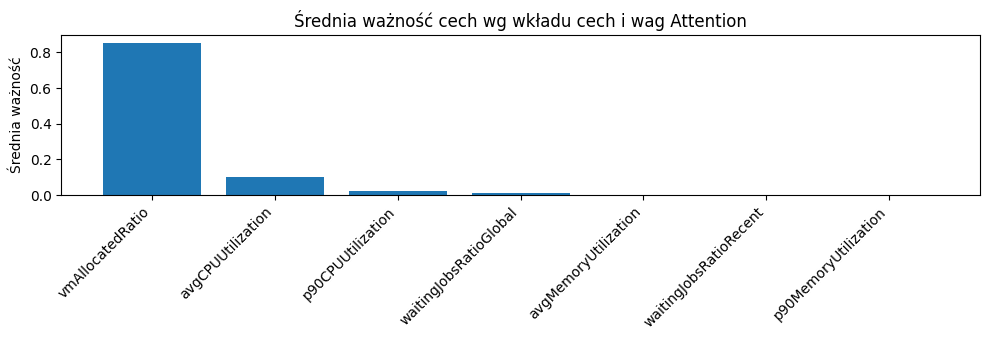

In [3]:
result = fs.select_from_attn_npz(
    npz_path=f"../logs/spca_corr_attn_all_{args.model_name}/attn_cumulative_final.npz",
    source="contrib",       
    mode="cumulative",     
    tau=0.95,                
    k=3,                    # for topk
    bar_value="mean",       # "mean" or "freq"
    plot=True,              
    save_path=None,         
    show=True,              
)

# MLP_LSTM - IG/SPCA

In [1]:
BASE_PATH=r'C:\initial_model\historic_synthetic_dnnevo\RANDOM\FINAL_MODELS\BASELINE'

In [2]:
BUF_PATH = r"C:\Users\ultramarine\Desktop\ppo_magisterka\trainloop_driver_official\trainloop_driver_final\trainloop-driver\rollouts_buffer_mlplstm.pkl"
#RES_PATH=r'C:\Users\ultramarine\Desktop\ppo_magisterka\trainloop_driver_official\trainloop_driver_final\trainloop-driver\logs\spca_corr_attn_all_mlplstm_rolling\spca_reservoir_final.npz'
MODEL_PATH=r'c:\initial_model\recurrentppo\MlpLstmPolicy\recurrentppo_MlpLstmPolicy_mlplstm_rolling_32.zip'

### Wybór liczby komponentów dla PCA i SPCA

[load_rollout_buffer] episodes=500, samples=120500, N=7
[load_rollout_buffer] episodes=500, samples=120500, N=7


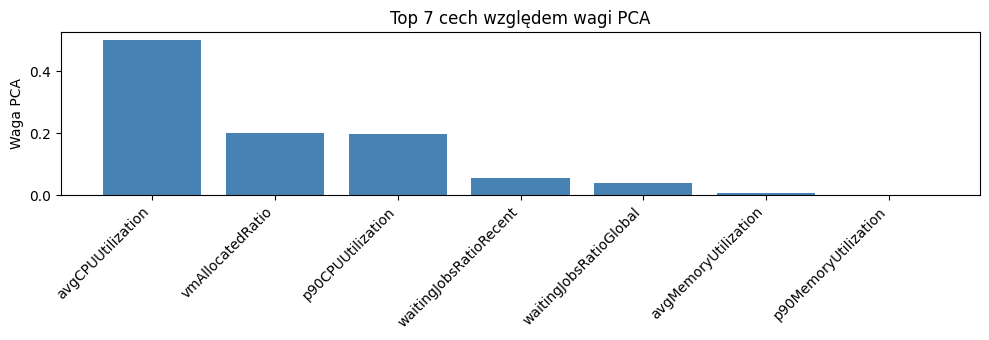

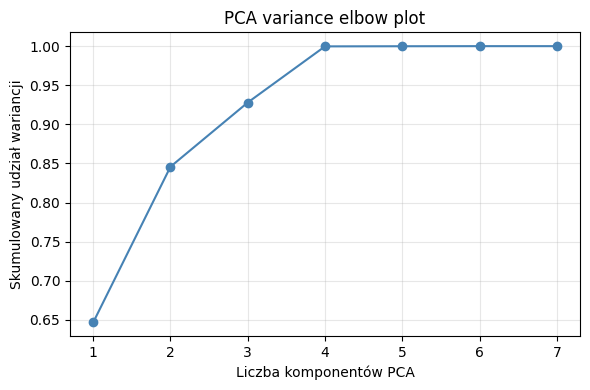

{'components': array([1, 2, 3, 4, 5, 6, 7]),
 'cum_explained_variance_ratio': array([0.64685267, 0.84585881, 0.92794124, 0.99970352, 0.99988015,
        1.        , 1.        ])}

In [ ]:
from spca_selector_backup import SimplePCASelector, load_rollout_buffer
from utils import FEATURE_NAMES
selector = SimplePCASelector(feature_names=FEATURE_NAMES, n_components=4, top_k=7)

X,y,names,meta = load_rollout_buffer(BUF_PATH, n_last=500)
res = selector.compute_from_array(X, names=FEATURE_NAMES, k=7, plot=True)
selector.plot_elbow(X, max_components=7, save_path="logs/pca_elbow.png", show=True)

In [ ]:
from spca_selector_backup import SimpleSPCASelector

from spca_selector_backup import load_rollout_buffer, save_loaded_buffer
X,y,names,meta = load_rollout_buffer(BUF_PATH, n_last=500)



[load_rollout_buffer] episodes=500, samples=120500, N=7
[load_rollout_buffer] episodes=500, samples=120500, N=7


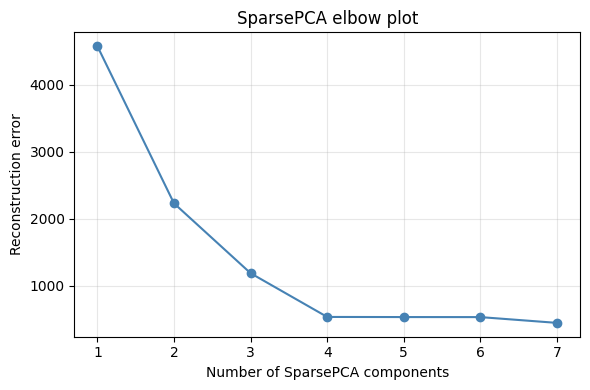

{'components': array([1, 2, 3, 4, 5, 6, 7]),
 'errors': array([4579.97743959, 2231.11728594, 1186.64604267,  533.03473929,
         531.20859367,  530.59174646,  444.2143644 ])}

In [5]:
from spca import plot_elbow
plot_elbow(X, alpha=1, ridge_alpha=0.01, max_components=7, save_path="logs/spca_elbow.png", show=True)

In [ ]:
from feature_selector import FeatureSelectionTrainer
import argparse
from sb3_contrib import RecurrentPPO

args = argparse.Namespace(
    policy="MlpLstmPolicy",
    algo="RecurrentPPO",
    model_name="mlplstm_baseline_1"
)

fs = FeatureSelectionTrainer(args, selection_method='spca')
fs.model = RecurrentPPO.load(MODEL_PATH)

[load_rollout_buffer] episodes=200, samples=48200, N=7
[load_rollout_buffer] episodes=200, samples=48200, N=7
[IG(action)] rows=48200, m_steps=50, batch=256, baseline=mean, recurrent=True
  processed 48200/48200
[Buffer] file=rollouts_buffer_mlplstm.pkl, rollouts=200, rows_used=48200, N=7

Top-7 cech wg IG (akcje):
   1. vmAllocatedRatio (#0)  ig=7.363176e-03
   2. avgCPUUtilization (#1)  ig=3.750475e-03
   3. p90CPUUtilization (#2)  ig=1.642553e-03
   4. waitingJobsRatioRecent (#6)  ig=4.092254e-05
   5. waitingJobsRatioGlobal (#5)  ig=3.461817e-05
   6. avgMemoryUtilization (#3)  ig=1.417042e-05
   7. p90MemoryUtilization (#4)  ig=0.000000e+00
Scores: [7.36317597e-03 3.75047466e-03 1.64255255e-03 1.41704231e-05
 0.00000000e+00 3.46181660e-05 4.09225395e-05]
SELECTED IDX:,[0 1 2]
Selected indices: [0 1 2]

[Selection/buffer] method=ig, mode=cumulative, selected 3 features
 1* vmAllocatedRatio     idx=0     score=0.00736318
 2* avgCPUUtilization    idx=1     score=0.00375047
 3* p90CPU

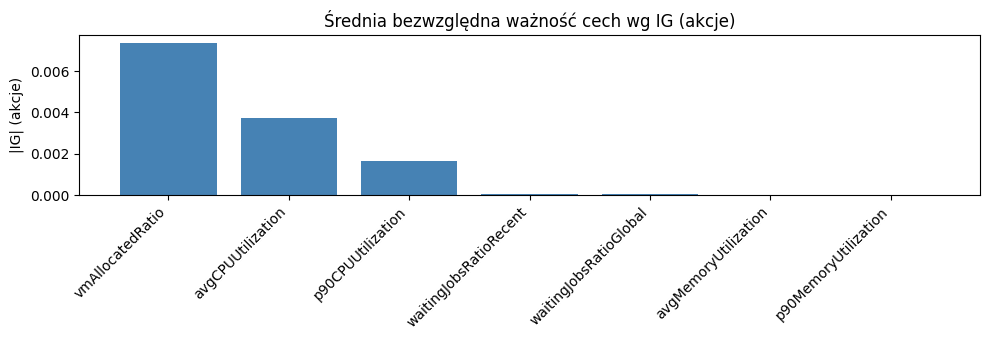

In [4]:
result = fs.select_from_buffer(
    buffer_path=BUF_PATH,
    method="ig",        # lub "ig"
    mode='cumulative',
    tau=0.95,
    spca_components=4,
    spca_alpha=1.0,
    ig_baseline="mean",
    ig_steps=50,
    ig_batch=256,
    #sample_frac=0.1,
    n_last_rollouts=200,
    seed=123,
    verbose=True,
    plot=True,
    top_k_plot=7,
    save_prefix="logs/BUFFER/",
    compute_ig=True,
)

[load_rollout_buffer] episodes=200, samples=48200, N=7
[load_rollout_buffer] episodes=200, samples=48200, N=7
[Buffer] file=rollouts_buffer_mlplstm.pkl, rollouts=200, rows_used=48200, N=7
Top-7 cech wg wagi SPCA:
   1. vmAllocatedRatio (#0)  w=0.559194
   2. avgCPUUtilization (#1)  w=0.202501
   3. p90CPUUtilization (#2)  w=0.079303
   4. avgMemoryUtilization (#3)  w=0.076489
   5. waitingJobsRatioGlobal (#5)  w=0.046626
   6. waitingJobsRatioRecent (#6)  w=0.035887
   7. p90MemoryUtilization (#4)  w=0.000000
Scores: [0.55919427 0.20250107 0.07930271 0.07648943 0.         0.04662582
 0.03588671]
SELECTED IDX:,[0 1 2 3 5]
Selected indices: [0 1 2 3 5]

[Selection/buffer] method=spca, mode=cumulative, selected 5 features
 1* vmAllocatedRatio     idx=0     score=0.559194
 2* avgCPUUtilization    idx=1     score=0.202501
 3* p90CPUUtilization    idx=2     score=0.0793027
 4* avgMemoryUtilization idx=3     score=0.0764894
 5* waitingJobsRatioGlobal idx=5     score=0.0466258


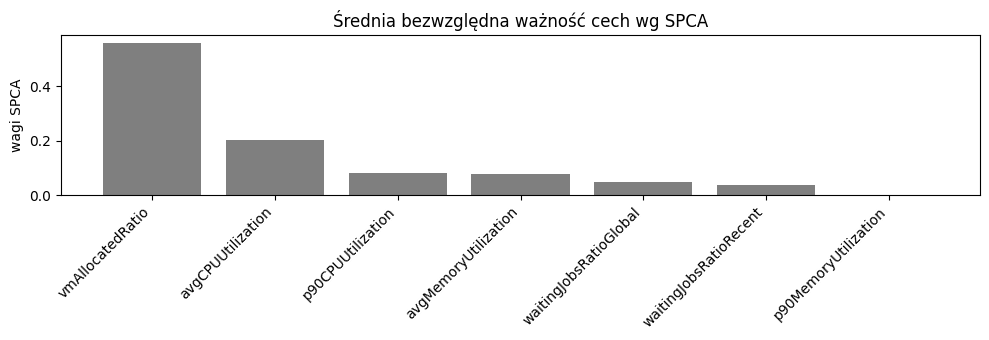

In [6]:
result = fs.select_from_buffer(
    buffer_path=BUF_PATH,
    method="spca",        # lub "ig"
    mode="cumulative",
    k=7,
    spca_components=4,
    spca_alpha=1.0,
    ig_baseline="mean",
    ig_steps=50,
    ig_batch=256,
    n_last_rollouts=200,
    seed=123,
    verbose=True,
    plot=True,
    top_k_plot=7,
    save_prefix="logs/BUFFER/",
    compute_ig=False,
)